# CSE475 Project, Due: Friday, 05/02/2025

## Instruction

1. Please submit your Jupyter Notebook file (the. ipynb file) containing your code and the outputs produced by your code (note that .ipynb file can contain both the code and the outputs) to Canvas. Please name your file CSE475-Project-LastName-FirstName.ipynb.

2. If you have any questions on the homework problems, you should post your question on the Canvas discussion board (under Project Q&A), instead of sending emails to the instructor or TA. We will answer your questions there. In this way, we can avoid repeated questions, and help the entire class stay on the same page whenever any clarification/correction is made.

## Handwritten Image Classifiation with Keras using MNIST and Fashion MNIST data

In this project, we will work with image data, the famous MNIST and Fashion MNIST data sets.  MNIST data set contains 70,000 images of handwritten digits (0-9) in grayscale (0=black, 255 = white). Fashion MNIST data set contains 70,000 images of clothing in grayscale (0=black, 255 = white). All the images are 28 pixels by 28 pixels for a total of 784 pixels. This is quite small by image standards. Also, the images are well centered and isolated. <br><br>
We will use a Convolutional Neural Network and compare it with a linear neural network.

### In the first part of this project, we will walk you through loading the data, building a neural network, and training it.  Then it will be your turn to work on different models.

In [44]:
# Preliminaries

from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.optimizers import RMSprop
from keras.datasets import fashion_mnist

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Let's explore the dataset a little bit

In [45]:
# Load the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [46]:
x_train.shape

(60000, 28, 28)

Let's just look at a particular example to see what is inside

In [47]:
x_train[333]  ## Just a 28 x 28 numpy array of ints from 0 to 255

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  87, 138,
        170, 253, 201, 244, 212, 222, 138,  86,  22,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  95, 253, 252,
        252, 252, 252, 253, 252, 252, 252, 252, 245,  80,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  68, 246, 205,  69,
         69,  69,  69,  69,  69,  69,  69, 205, 253, 240,  50,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 187, 252, 218,  34,
          0,   0,   0,   0,   0,   0,   0, 116, 253, 252,  69,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 116, 248, 252, 253,  92,
          0,   0,   0,   0,   0,   0,  95, 230, 253, 157,   6,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 116, 249, 253, 189,  42,
          0,   0,   0,   0,  36, 170, 253, 243, 158,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 133, 252, 245, 140,
         34,   0,   0,  57, 219, 252, 235,  60,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  25, 205, 253, 252,
        234, 184, 184, 253, 240, 100,  44,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  21, 161, 219,
        252, 252, 252, 234,  37,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 203,
        252, 252, 252, 251, 135,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   9,  76, 255, 253,
        205, 168, 220, 255, 253, 137,   5,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 114, 252, 249, 132,
         25,   0,   0, 180, 252, 252,  45,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  51, 220, 252, 199,   0,
          0,   0,   0,  38, 186, 252, 154,   7,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 184, 252, 252,  21,   0,
          0,   0,   0,   0,  67, 252, 252,  22,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 184, 252, 200,   0,   0,
          0,   0,   0,   0,  47, 252, 252,  22,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 185, 253, 201,   0,   0,
          0,   0,   0,   3, 118, 253, 245,  21,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 163, 252, 252,   0,   0,
          0,   0,   0,  97, 252, 252,  87,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  51, 240, 252, 123,  70,
         70, 112, 184, 222, 252, 170,  13,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 165, 252, 253, 252,
        252, 252, 252, 245, 139,  13,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [48]:
# What is the corresponding label in the training set?
y_train[333]

np.uint8(8)

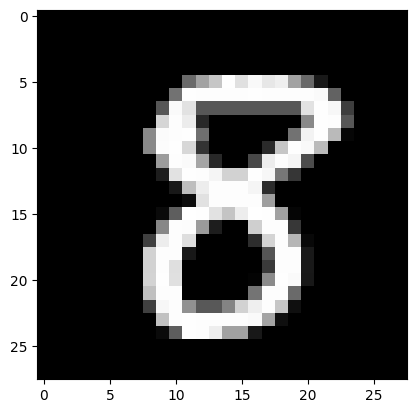

In [49]:
# Let's see what this image actually looks like

plt.imshow(x_train[333], cmap='Greys_r')

In [50]:
# this is the shape of the np.array x_train
# it is 3 dimensional.
print(x_train.shape, 'train samples')
print(x_test.shape, 'test samples')

(60000, 28, 28) train samples
(10000, 28, 28) test samples


In [51]:
## For our purposes, these images are just a vector of 784 inputs, so let's convert
x_train = x_train.reshape(len(x_train), 28*28)
x_test = x_test.reshape(len(x_test), 28*28)

## Keras works with floats, so we must cast the numbers to floats
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

## Normalize the inputs so they are between 0 and 1
x_train /= 255
x_test /= 255


In [52]:
# convert class labels to one-hot vectors
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

y_train[333]  # now the digit k is represented by a 1 in the kth entry (0-indexed) of the length 10 vector

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])

In [53]:
# We will build a model with two fully connected layers (using "Dense")
# We will use dropout of .5 to help regularize
model_1 = Sequential()
model_1.add(Dense(64, activation='relu', input_shape=(784,)))
model_1.add(Dropout(0.5))
model_1.add(Dense(64, activation='relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(10, activation='softmax'))

In [54]:
## print the summary of the built model. Note that this model has a LOT of parameters
model_1.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 55,050 (215.04 KB)

 Trainable params: 55,050 (215.04 KB)

 Non-trainable params: 0 (0.00 B)

In [55]:
# Let's compile the model
learning_rate = .001
model_1.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(learning_rate=learning_rate),
              metrics=['accuracy'])
# note that `categorical cross entropy` is the natural generalization
# of the loss function we had in binary classification case to multiclass case

In [56]:
# Now let's fit (train model_1).

batch_size = 128  # mini-batch with 128 examples
epochs = 30
history = model_1.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test))

Epoch 1/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.5833 - loss: 1.2484 - val_accuracy: 0.9225 - val_loss: 0.2739
Epoch 2/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8607 - loss: 0.4871 - val_accuracy: 0.9335 - val_loss: 0.2248
Epoch 3/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8853 - loss: 0.4093 - val_accuracy: 0.9446 - val_loss: 0.1943
Epoch 4/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9014 - loss: 0.3549 - val_accuracy: 0.9471 - val_loss: 0.1867
Epoch 5/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9086 - loss: 0.3315 - val_accuracy: 0.9528 - val_loss: 0.1664
Epoch 6/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9122 - loss: 0.3181 - val_accuracy: 0.9547 - val_loss: 0.1660
Epoch 7/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9137 - loss: 0.3156 - val_accuracy: 0.9569 - val_loss: 0.1527
Epoch 8/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9205 - loss: 0.2921 - val_accuracy: 0.

In [57]:
## We will use Keras evaluate function to evaluate performance on the test set

score = model_1.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.16815125942230225
Test accuracy: 0.9652000069618225


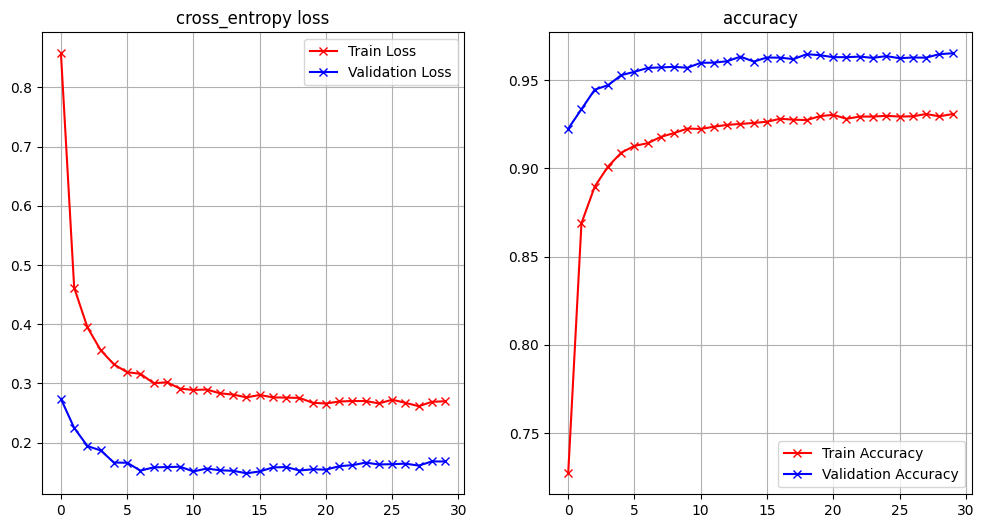

In [58]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)

    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["accuracy"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_accuracy"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)

plot_loss_accuracy(history)

This is reasonably good performance, but we can do even better!  Next you will build an even bigger network and compare the performance.

### Keras Layers for CNNs
- Previously we built a neural network using primarily the Dense, Activation and Dropout Layers.

- Here we will describe how to use some of the CNN-specific layers provided by Keras

#### Conv2D

```python
keras.layers.convolutional.Conv2D(filters, kernel_size, strides=(1, 1), padding='valid', data_format=None, dilation_rate=(1, 1), activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None, **kwargs)
```

A few parameters explained below for your convenience (please do check the manual of Keras to understand the meaning of all the paramters)
- `filters`: the number of filters,  in other words, the depth of the output.
- `kernel_size`: an (H,W) tuple giving the height and width of the kernel (filter) to be used. It can also be an integer x which is equivalent to a tuple (x,x)
- `strides`: and (x,y) tuple giving the stride in each dimension.  Default is `(1,1)`. It can also be an integer x which is equivalent to a tuple (x,x)
- `input_shape`: required only for the first layer

Note that the size of the output will be determined by the kernel_size and strides.

#### MaxPooling2D
`keras.layers.pooling.MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None)`

- `pool_size`: the (x,y) size of the grid to be pooled.
- `strides`: Assumed to be the `pool_size` unless otherwise specified

#### Flatten
Turns its input into a one-dimensional vector (per instance).  Usually used when transitioning between convolutional layers and fully connected layers.


# Your tasks for this project (three tasks, (1)-(3))


### (1) Build your own CNN model (30pts)
Use the Keras "Sequential" functionality to build a convolutional neural network named `model_2` with the following specifications:
<br>
<br>
Model Architecture:<br>
We will build model_2 according to the famous LeNet-5 architecutre below and measure its performance.
<br>
    Convolution -> Relu -> Max pooling -> Convolution -> Relu -> Max pooling -> FC1 -> Relu -> FC2 -> Relu -> Output(SoftMax)
<br>

1. Convolution1 kernel size: 5(H) x 5(W) x 6(filters), stride = 1, no padding
2. Max pooling1 kernel size: 2(H) x 2(W), stride = 2
3. Convolution2 kernel size: 5(H) x 5(W) x 16(filters), stride = 1, no padding
4. Max pooling2 kernel size: 2(H) x 2(W), stride = 2
5. Fully Connected1 size: 120
6. Fully Connected2 size: 84
7. Train this model for 20 epochs with RMSProp at a learning rate of .001 and a batch size of 128
8. Plot the loss and accuracy graph for training the new model
9. Evaluate the model on test data

Please train the built model on the training data (x_train, y_train), and print the test loss and test accuracy of the trained model on the test data (x_test, y_test). Please call the given plot_loss_accuracy function on the history returned by model_2.fit to have the curves of loss and accuracy on the training data and the validation data during the training process of model_2. Note that the validation data is the same as the test data.

Hints:
<ul>
  <li> You will need to have a Flatten layer to make the dimension of the Output be 10 (the number of classes). Check how to connect the output of convolution layer with the first fully connected layer.
<li> You will not be graded on the accuracy of your model, but it should have a decent accuracy of at least 70%. Performance below 70% means there is something wrong with the implementation.
<li> Do not use any padding or dropout in model_2. Such choices can be used for Project Bonus and Fashion MNIST.
    </li></ul>

To use the LeNet model, we need to do some preprocessing on the data first.

In [59]:
# Data is currently flattened, we need to reshape it back to 28 * 28. To do that we reshape the data.

x_train = np.reshape(x_train, [-1, 28, 28])
x_test = np.reshape(x_test, [-1, 28, 28])
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [60]:
# model_2 requires input of 32 X 32. So we will pad the train and test images with zeros to increase the size to 32 X 32.

x_train=np.pad(x_train, ((0,0), (2,2), (2, 2)), 'constant')
x_test=np.pad(x_test, ((0,0), (2,2), (2, 2)), 'constant')
x_train.shape, x_test.shape

((60000, 32, 32), (10000, 32, 32))

In [61]:
# Convolutional model requires input to be of 3 dimensions. We will add a channel dimension to it.

x_train = np.reshape(x_train, [-1, 32, 32, 1])
x_test = np.reshape(x_test, [-1, 32, 32, 1])
x_train.shape, x_test.shape

((60000, 32, 32, 1), (10000, 32, 32, 1))

### Write your code below for task (1)

In [85]:

model_2 = Sequential()
model_2.add(Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(32, 32, 1)))
model_2.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model_2.add(Conv2D(16, kernel_size=(5, 5), activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model_2.add(Flatten())
model_2.add(Dense(120, activation='relu'))
model_2.add(Dense(84, activation='relu'))
model_2.add(Dense(num_classes, activation='softmax'))
model_2.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)              │ (None, 28, 28, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 14, 14, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 10, 10, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 5, 5, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 120)            │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 61,706 (241.04 KB)

 Trainable params: 61,706 (241.04 KB)

 Non-trainable params: 0 (0.00 B)

In [64]:
model_2.compile(
    loss='categorical_crossentropy',
    optimizer=RMSprop(learning_rate=learning_rate),
    metrics=['accuracy']
)
history2 = model_2.fit(
    x_train, y_train,
    batch_size=128,
    epochs=20,
    verbose=1,
    validation_data=(x_test, y_test)
)

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8152 - loss: 0.6083 - val_accuracy: 0.9608 - val_loss: 0.1168
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9737 - loss: 0.0857 - val_accuracy: 0.9832 - val_loss: 0.0483
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9824 - loss: 0.0549 - val_accuracy: 0.9864 - val_loss: 0.0390
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9877 - loss: 0.0395 - val_accuracy: 0.9890 - val_loss: 0.0320
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9893 - loss: 0.0336 - val_accuracy: 0.9869 - val_loss: 0.0395
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9923 - loss: 0.0251 - val_accuracy: 0.9869 - val_loss: 0.0418
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9934 - loss: 0.0210 - val_accuracy: 0.9892 - val_loss: 0.0364
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9947 - loss: 0.0173 - val_accuracy: 0.

In [65]:
score2 = model_2.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score2[0])
print('Test accuracy:', score2[1])

Test loss: 0.05163668841123581
Test accuracy: 0.9900000095367432


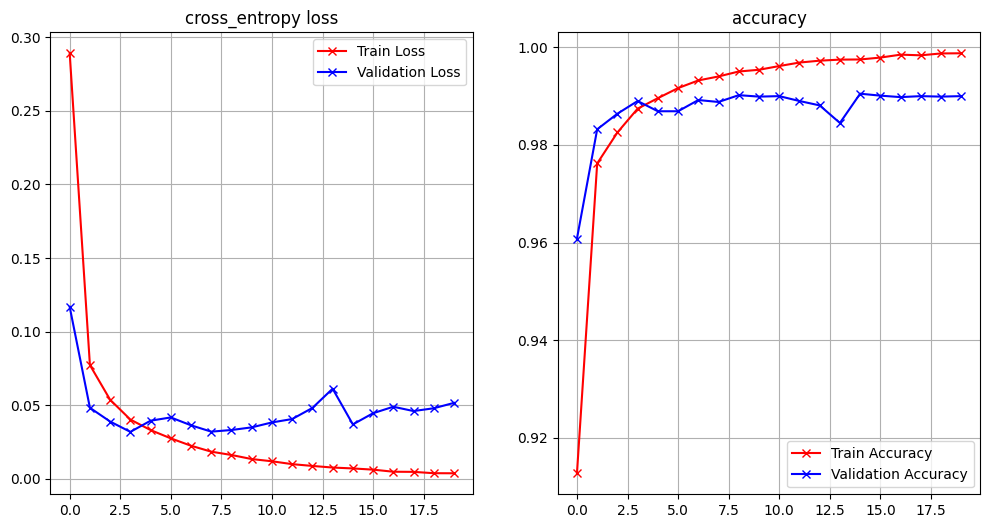

In [66]:
plot_loss_accuracy(history2)

### (2) Answer the following question (20pts)

Compare the curves of the loss and accuracy on the training data and the validation (test) data for model_1 and model_2. Please write down your observations. For example, (1) which model has higher validation (test) loss?  (2) which model has higher validation (test) accuracy? (3) Do (1)-(2) for the training loss and the training accuracy; (4) Which measure do you think is more meaningful, the loss or the accuracy?

In [86]:
print("Model 1 (MLP):")
print(f"Training Loss:  {history.history['loss'][-1]:.4f}")
print(f"Validation Loss:  {history.history['val_loss'][-1]:.4f}")
print(f"Training Accuracy:  {history.history['accuracy'][-1]:.4f}")
print(f"Validation Accuracy:   {history.history['val_accuracy'][-1]:.4f}\n")

print("Model 2 (LeNet‐5 CNN):")
print(f"Training Loss:  {history2.history['loss'][-1]:.4f}")
print(f"Validation Loss:  {history2.history['val_loss'][-1]:.4f}")
print(f"Training Accuracy:  {history2.history['accuracy'][-1]:.4f}")
print(f"Validation Accuracy:  {history2.history['val_accuracy'][-1]:.4f}\n")

Model 1 (MLP):
Training Loss:  0.2698
Validation Loss:  0.1682
Training Accuracy:  0.9308
Validation Accuracy:   0.9652

Model 2 (LeNet‐5 CNN):
Training Loss:  0.0038
Validation Loss:  0.0516
Training Accuracy:  0.9988
Validation Accuracy:  0.9900



# Task 2: Comparison of Model 1 vs. Model 2

## 1. Validation (Test) Loss:
Model 1 has the higher validation loss.

## 2. Validation (Test) Accuracy:
Model 2 has the higher validation accuracy.


## 3. Training Loss & Accuracy:
Training Loss: <br>
Model 1 has the higher training loss.  <br>  

Training Accuracy:  <br>
Model 2 has the higher training accuracy.


## 4. Which Measure Is Most Meaningful:
Loss is essential for directing the training process (sensitive to confidence), but accuracy is offers better understanding of the final performance.

Validation accuracy is therefore the most meaningful measure for comparing these two models in practice.

### We will perform similar tasks for Fashion MNIST dataset.

Fashion MNIST has 10 categories of clothing items:<br>

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

In [68]:
# Load the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [69]:
x_train[0].shape

(28, 28)

In [70]:
#Let's just look at a particular example to see what is inside

x_train[333]  ## Just a 28 x 28 numpy array of ints from 0 to 255

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,   0,
         42,  92,  71, 107,  33,   0,   3,   0,   1,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   2,   0,  23,
        145,   0,   0,   0, 113,  20,   0,   3,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  89,
          8,   0,  10,   0,  36, 104,   0,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   3,   0,  37,  97,
          0,   5,   1,   0,   0, 141,  23,   0,   2,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   5,   0,  70,  75,
          0,   6,   1,   0,   0, 141,  56,   0,   5,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0,  85,  57,
          0,   5,   1,   1,   0, 126,  62,   0,   6,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0,  85,  44,
          0,   3,   0,   4,   0, 109,  66,   0,   6,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0,  75,  41,
          0,   3,   0,   5,   0,  89,  68,   0,   6,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   5,   0,  71,  44,
          0,   3,   0,   6,   0,  74,  69,   0,   6,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   4,   0,  80,  68,
          0,   4,   0,   5,   0,  89,  85,   0,   6,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   2,   3,   8,   0,  74,  89,
          0,  10,   3,  10,   0,  98,  84,   0,  10,   4,   3,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  30,  80,
          0,   0,   0,   0,   0,  69,  37,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   2,   0,  80, 117, 118,  92, 125, 144,
        109, 141, 126, 132, 115, 151, 141, 130, 142, 150,  57,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  81, 162, 158, 153, 165, 192,
        182, 196, 187, 172, 183, 203, 206, 195, 188, 200, 140,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 114, 158, 169, 164, 164, 196,
        183, 177, 168, 163, 174, 195, 198, 195, 174, 170, 142,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 186, 166, 161, 180, 183, 214,
        181, 158, 163, 181, 186, 197, 186, 184, 193, 197,  86,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 162, 195, 185, 182, 186, 186,
        186, 193, 194, 194, 196, 195, 195, 192, 184, 215, 161,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 165, 233, 219, 230, 235, 230,
        228, 229, 229, 221, 218, 217, 215, 212, 204, 221, 160,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 134, 202, 221, 218, 220, 224, 222,
        220, 219, 221, 219, 213, 213, 208, 208, 199, 220, 142,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  92, 213, 205, 233, 217, 226, 225, 226,
        222, 220, 219, 219, 217, 214, 212, 209, 195, 231, 126,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 120,   0, 187, 247, 221, 224, 225, 222,
        218, 219, 219, 219, 216, 214, 212, 210, 197, 246, 130,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 206, 243, 231, 228, 230, 228,
        225, 226, 225, 222, 217, 215, 215, 211, 212, 255, 126,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  68,   0, 149, 244, 227, 229, 235, 229,
        228, 227, 216, 212, 211, 211, 211, 209, 214, 233, 120,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 117, 124, 151, 242, 232, 238, 237, 232,
        230, 226, 216, 213, 215, 211, 208, 206, 214, 232, 114,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 13

In [71]:
# What is the corresponding label in the training set?
y_train[333]

np.uint8(8)

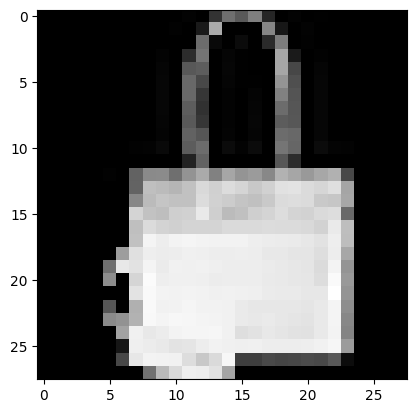

In [72]:
# Let's see what this image actually looks like

plt.imshow(x_train[333], cmap='Greys_r')

In [73]:
# this is the shape of the np.array x_train
# it is 3 dimensional.
print(x_train.shape, 'train samples')
print(x_test.shape, 'test samples')

(60000, 28, 28) train samples
(10000, 28, 28) test samples


In [74]:
## For our purposes, these images are just a vector of 784 inputs, so let's convert
x_train = x_train.reshape(len(x_train), 28*28)
x_test = x_test.reshape(len(x_test), 28*28)

## Keras works with floats, so we must cast the numbers to floats
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

## Normalize the inputs so they are between 0 and 1
x_train /= 255
x_test /= 255

In [75]:
# convert class vectors to binary class matrices
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

y_train[333]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])

Reperforming the earlier preprocessing methods

In [76]:
# Data is currently flattened, we need to reshape it back to 28 * 28. To do that we reshape the data.

x_train = np.reshape(x_train, [-1, 28, 28])
x_test = np.reshape(x_test, [-1, 28, 28])
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [77]:
# LeNet requires input of 32 X 32. So we will pad the train and test images with zeros to increase the size to 32 X 32.

x_train=np.pad(x_train, ((0,0), (2,2), (2, 2)), 'constant')
x_test=np.pad(x_test, ((0,0), (2,2), (2, 2)), 'constant')
x_train.shape, x_test.shape

((60000, 32, 32), (10000, 32, 32))

In [78]:
# Convolutional model requires input to be of 3 dimensions. We will add a channel dimension to it.

x_train = np.reshape(x_train, [-1, 32, 32, 1])
x_test = np.reshape(x_test, [-1, 32, 32, 1])
x_train.shape, x_test.shape

((60000, 32, 32, 1), (10000, 32, 32, 1))

### (3) Training on Fashion MNIST (50pts)

Build a convolutional neural network of your choice. You can freely choose a differnet network structure, learning rate or number of epochs, which (you believe) will lead to a good model for this data set. Report the accuracy of your model on the test data (x_test,y_test).

### Write your code below for task (3)

In [84]:
model_3 = Sequential()
model_3.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 1)))
model_3.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model_3.add(Dropout(0.25))
model_3.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model_3.add(Dropout(0.25))
model_3.add(Flatten())
model_3.add(Dense(128, activation='relu'))
model_3.add(Dropout(0.5))
model_3.add(Dense(num_classes, activation='softmax'))
model_3.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 30, 30, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 315,146 (1.20 MB)

 Trainable params: 315,146 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

In [81]:
model_3.compile(
    loss='categorical_crossentropy',
    optimizer=RMSprop(learning_rate=0.001),
    metrics=['accuracy']
)
history3 = model_3.fit(
    x_train, y_train,
    batch_size=128,
    epochs=20,
    verbose=1,
    validation_data=(x_test, y_test)
)

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.6713 - loss: 0.9142 - val_accuracy: 0.8555 - val_loss: 0.3964
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8456 - loss: 0.4301 - val_accuracy: 0.8788 - val_loss: 0.3385
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8713 - loss: 0.3635 - val_accuracy: 0.8865 - val_loss: 0.3034
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8820 - loss: 0.3301 - val_accuracy: 0.8996 - val_loss: 0.2845
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8919 - loss: 0.3054 - val_accuracy: 0.9020 - val_loss: 0.2750
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8939 - loss: 0.2931 - val_accuracy: 0.9045 - val_loss: 0.2664
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9005 - loss: 0.2794 - val_accuracy: 0.9081 - val_loss: 0.2554
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9064 - loss: 0.2641 - val_accuracy: 0

In [82]:
score3 = model_3.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score3[0])
print('Test accuracy:', score3[1])

Test loss: 0.2446592003107071
Test accuracy: 0.9132999777793884


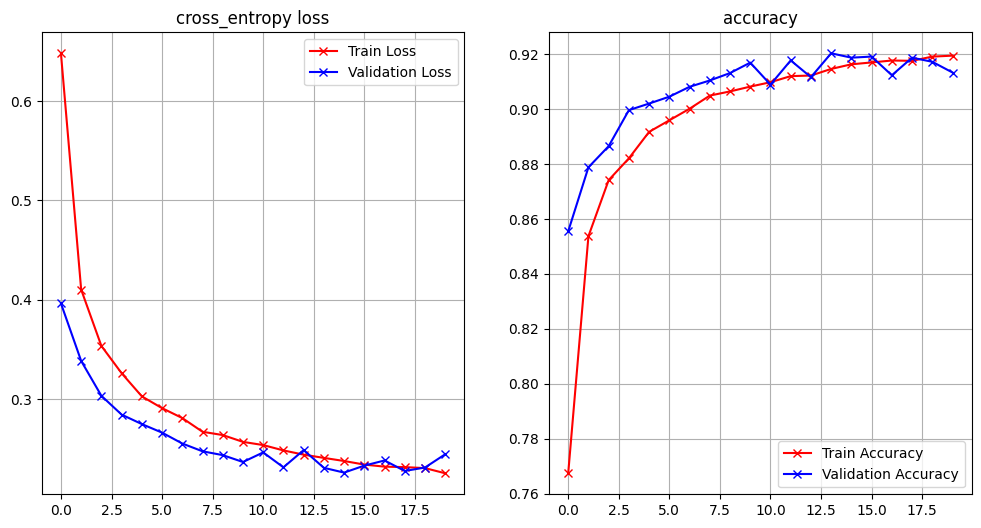

In [83]:
plot_loss_accuracy(history3)